In [2]:
import pandas as pd
import numpy as np

seconds = np.arange(1500, dtype=np.int32)
df = pd.DataFrame({"seconds": seconds})
df["gravity"] = 9.81
df["thrust"] = 0.0

df.head(df.shape[0])

,seconds,gravity,thrust
0,0,9.81,0.0
1,1,9.81,0.0
2,2,9.81,0.0
3,3,9.81,0.0
4,4,9.81,0.0
...,...,...,...
1495,1495,9.81,0.0
1496,1496,9.81,0.0
1497,1497,9.81,0.0
1498,1498,9.81,0.0


In [22]:
activation_time = 69
strength = 10.29

df.loc[activation_time:, "thrust"] = strength
df.head(df.shape[0])

,gravity,thrust,acceleration,speed,altitude [km]
0,9.81,0.00,9.81,9.81,499.99019
1,9.81,0.00,9.81,19.62,499.97057
2,9.81,0.00,9.81,29.43,499.94114
3,9.81,0.00,9.81,39.24,499.90190
4,9.81,0.00,9.81,49.05,499.85285
...,...,...,...,...,...
1495,9.81,10.29,-80.19,-54964.24,19270.73364
1496,9.81,10.29,-80.19,-55044.43,19325.77807
1497,9.81,10.29,-80.19,-55124.62,19380.90269
1498,9.81,10.29,-80.19,-55204.81,19436.10750


In [23]:
df["acceleration"] = df["gravity"] - df["thrust"]
df["speed"] = df["acceleration"].cumsum()
initial_altitude = 500
df["altitude [km]"] = initial_altitude - (df["speed"].cumsum() / 1000)
df.head(df.shape[0])

,gravity,thrust,acceleration,speed,altitude [km]
0,9.81,0.00,9.81,9.81,499.99019
1,9.81,0.00,9.81,19.62,499.97057
2,9.81,0.00,9.81,29.43,499.94114
3,9.81,0.00,9.81,39.24,499.90190
4,9.81,0.00,9.81,49.05,499.85285
...,...,...,...,...,...
1495,9.81,10.29,-0.48,-8.07,-0.55174
1496,9.81,10.29,-0.48,-8.55,-0.54319
1497,9.81,10.29,-0.48,-9.03,-0.53416
1498,9.81,10.29,-0.48,-9.51,-0.52465


In [12]:
df.drop("seconds", axis=1, inplace=True)

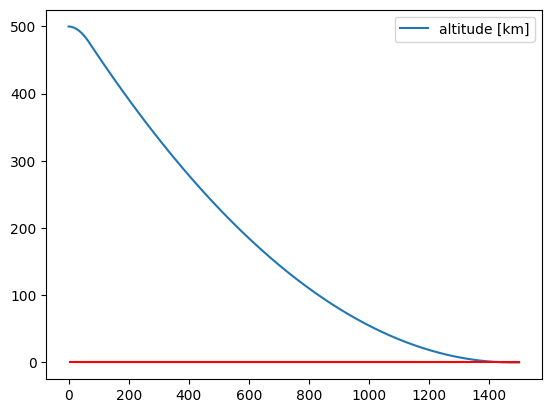

In [26]:
from matplotlib import pyplot as plt

df[["altitude [km]"]].plot()
plt.hlines(xmin=0.0, xmax=1500, y=0.0, color="red")

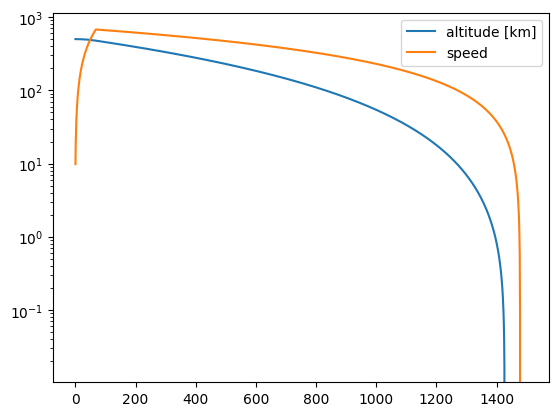

In [27]:
ax = df[["altitude [km]", "speed"]].plot()
ax.set_yscale("log")